- generate data :
 - main dataframe with nct_id and with startDate
 - not yet minmaxscaled/filterout 90% values (only do it after done filtering out rows)
 - separated col main/names etc
 - still keep all from 2011  enrol 0 et NA phase

In [107]:
'''import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
overallofficiallocations = pd.read_pickle('raw_data/overallofficiallocations.pkl')
# supposedely raw directly from database
ct_raw = pd.read_pickle('raw_data/ct_raw.pkl')
df = ct_raw[ct_raw['phases'].isin(["['PHASE1', 'PHASE2']", "['PHASE2', 'PHASE3']"])]
df
overallofficiallocations
overallofficiallocations = overallofficiallocations[overallofficiallocations['nct_id'].isin(df['nct_id'])]
overallofficiallocations.dropna(subset=['country'], inplace=True)
overallofficiallocations = pd.merge(overallofficiallocations, df[['overallStatus','nct_id']], left_on='nct_id', right_on='nct_id', how='left')
# Filter the DataFrame to include only relevant columns
df = overallofficiallocations[['country', 'overallStatus']]

# Count occurrences of each country
country_counts = df['country'].value_counts()

# Count occurrences of overallStatus being TERMINATED or COMPLETED for each country
status_counts = df[df['overallStatus'].isin(['TERMINATED', 'COMPLETED'])]['country'].value_counts()

# Create a DataFrame with the counts
counts_df = pd.DataFrame({
    'Total': country_counts,
    'Terminated/Completed': status_counts
}).fillna(0)

# Select top 15 countries based on the total count
top_15_counts_df = counts_df.head(20)



# Sort the DataFrame by Total count
top_15_counts_df = top_15_counts_df.sort_values(by='Total', ascending=False)

# Visualize the counts using a horizontal bar plot
plt.figure(figsize=(5, 5))
ax = top_15_counts_df.plot(kind='barh', stacked=True, color=['skyblue', 'orange'])

# Add text annotations for the total count
for index, value in enumerate(top_15_counts_df['Total']):
    ax.text(value + 1, index, str(int(value)), va='center')

plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Top 20 Countries count of TERMINATED \nand COMPLETED Phase 2 trials since 2019')
plt.legend(title='Status')
plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\noverallofficiallocations = pd.read_pickle(\'raw_data/overallofficiallocations.pkl\')\n# supposedely raw directly from database\nct_raw = pd.read_pickle(\'raw_data/ct_raw.pkl\')\ndf = ct_raw[ct_raw[\'phases\'].isin(["[\'PHASE1\', \'PHASE2\']", "[\'PHASE2\', \'PHASE3\']"])]\ndf\noverallofficiallocations\noverallofficiallocations = overallofficiallocations[overallofficiallocations[\'nct_id\'].isin(df[\'nct_id\'])]\noverallofficiallocations.dropna(subset=[\'country\'], inplace=True)\noverallofficiallocations = pd.merge(overallofficiallocations, df[[\'overallStatus\',\'nct_id\']], left_on=\'nct_id\', right_on=\'nct_id\', how=\'left\')\n# Filter the DataFrame to include only relevant columns\ndf = overallofficiallocations[[\'country\', \'overallStatus\']]\n\n# Count occurrences of each country\ncountry_counts = df[\'country\'].value_counts()\n\n# Count occurrences of overallStatus being TERMINATED or COMPLETED for 

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# edit pandas setting to always print all the columns
pd.set_option('display.max_columns', None)



# supposedely raw directly from database
ct_raw = pd.read_pickle('raw_data/ct_raw.pkl')
stop_reason = pd.read_pickle('raw_data/stop_reason.pkl')
gdp = pd.read_csv('raw_data/gdp.csv')
collab = pd.read_pickle('raw_data/collab.pkl')
locations = pd.read_pickle('raw_data/locations.pkl')
overallofficiallocations = pd.read_pickle('raw_data/overallofficiallocations.pkl')
term_meshes = pd.read_pickle('raw_data/term_meshes.pkl')
#conditions = pd.read_pickle('raw_data/conditions.pkl')
pregnancy_eligibility = pd.read_pickle('raw_data/pregnancy_eligibility.pkl')
multi_df=pd.read_pickle('raw_data/aggregated_locations.pkl')
covid_trial = pd.read_pickle('raw_data/covid_trial.pkl')
xtra_var = pd.read_csv('raw_data/ct_extra_var.csv')

In [109]:
ct_raw['startDate'].value_counts()
ct_raw =ct_raw[ct_raw['startDate']>2018]
ct_raw = ct_raw[ct_raw['study_type']=='INTERVENTIONAL']
ct_raw = ct_raw[~ct_raw['phases'].isin(["['NA']", "['EARLY_PHASE1']", "['PHASE4']"])]
#ct_raw = ct_raw[~ct_raw['phases'].isin(["['EARLY_PHASE1']", "['PHASE4']"])]
ct_raw.drop(columns=['study_type','genderBased','overallofficial_city'], inplace=True)
ct_raw['startDate'].value_counts()

startDate
2019    4348
2020    4342
2021    3823
2022    2539
2023    1118
2024     186
Name: count, dtype: int64

In [110]:

# filter out added by error rows
ct_raw = ct_raw[~ct_raw['nct_id'].isin(stop_reason[stop_reason['category']=='added_by_error']['nct_id'])]
 
# filter out covid-19 restrictions early termination
ct_raw = ct_raw[~ct_raw['nct_id'].isin(stop_reason[stop_reason['category']=='covid-19_and_similar_epidemic_related']['nct_id'])]

# define covid trials (trials containing main mesh term coronaviradae infections)
ct_raw['is_covid_trial'] = ct_raw['nct_id'].isin(covid_trial['nct_id'])

# rare diseases
ct_raw['is_Rare'] = ct_raw['nct_id'].isin(term_meshes[term_meshes['term']=='Rare Diseases']['nct_id'])

In [111]:
ct_raw[ct_raw['is_Rare']== True]['phases'].value_counts()

phases
['PHASE2']              1956
['PHASE1']              1613
['PHASE3']               871
['PHASE1', 'PHASE2']     522
['PHASE2', 'PHASE3']     179
Name: count, dtype: int64

In [112]:
ct_raw.isna().sum()

nct_id                           0
org_name                         0
org_study_class                  0
overallStatus                    0
startDate                        0
lead_sponsor                     0
sponsor_class                    0
oversighthasdmc                  0
isfdaregulateddrug               0
isfdaregulateddevice             0
phases                           0
interventionModel                0
timePerspective                  0
primaryPurpose                   0
mask_type                        0
randomized                    3558
enroll_count_type                0
enrollment_count                 0
estimated_enrollment         12915
actual_enrollment              186
unknown_enrollment_type      14531
arm_group_count                  0
intervention_type                0
healthyVolunteers                0
sex                              4
stdAges                          0
why_stopped                  12167
overallofficial_country          0
overallofficial_cont

## Filter csv nct_id dates and save to pickle

## insert pregnancy eligibility

In [113]:

pregnancy_eligibility = pregnancy_eligibility[['nct_id','pregnant_only','ci_pregnancy']]
ct_raw = ct_raw.merge(pregnancy_eligibility, on='nct_id', how='left')
# fill bool pregnant_only and ci_preg na with false
ct_raw['pregnant_only'] = ct_raw['pregnant_only'].fillna(False)
ct_raw['ci_pregnancy'] = ct_raw['ci_pregnancy'].fillna(False)

## adding new vars

In [114]:
#ct_raw.drop(columns=['estimated_enrollment'], inplace=True)
ct_raw = pd.merge(ct_raw, xtra_var[['nct_id','original_enrollment_count']], on='nct_id', how='left')
#ct_raw.rename(columns={'original_enrollment_count':'estimated_enrollment'}, inplace=True)

In [115]:
# Calculate the thresholds
ct_raw['90_orig_enroll'] = ct_raw['original_enrollment_count'] * 0.90
ct_raw['75_orig_enroll'] = ct_raw['original_enrollment_count'] * 0.75
ct_raw['50_orig_enroll'] = ct_raw['original_enrollment_count'] * 0.50

# Create boolean columns with the specified names
ct_raw['less_than_90_orig_enroll'] = ct_raw['enrollment_count'] < ct_raw['90_orig_enroll']
ct_raw['less_than_75_orig_enroll'] = ct_raw['enrollment_count'] < ct_raw['75_orig_enroll']
ct_raw['less_than_50_orig_enroll'] = ct_raw['enrollment_count'] < ct_raw['50_orig_enroll']
ct_raw['more_than_50_orig_enroll'] = ct_raw['enrollment_count'] > ct_raw['50_orig_enroll']
ct_raw['more_than_75_orig_enroll'] = ct_raw['enrollment_count'] > ct_raw['75_orig_enroll']
# Drop the intermediate threshold columns
ct_raw.drop(columns=['90_orig_enroll', '75_orig_enroll', '50_orig_enroll'], inplace=True)

# Display the updated DataFrame
ct_raw.drop(columns=['enrollment_count'], inplace=True)
xtra_var.rename(columns={'enrolled_less_than_original':'enrolled_less_than_orig_enroll'}, inplace=True)
ct_raw[['original_enrollment_count', 'less_than_90_orig_enroll', 'less_than_75_orig_enroll', 'less_than_50_orig_enroll', 'more_than_50_orig_enroll']]

,original_enrollment_count,less_than_90_orig_enroll,less_than_75_orig_enroll,less_than_50_orig_enroll,more_than_50_orig_enroll
0,40.0,True,True,True,False
1,0.0,False,False,False,False
2,0.0,False,False,False,False
3,476.0,True,True,True,False
4,368.0,True,True,True,False
...,...,...,...,...,...
17428,45.0,False,False,False,True
17429,32.0,False,False,False,True
17430,22.0,False,False,False,True
17431,183.0,False,False,False,True


In [116]:
ct_raw

,nct_id,org_name,org_study_class,overallStatus,startDate,lead_sponsor,sponsor_class,oversighthasdmc,isfdaregulateddrug,isfdaregulateddevice,phases,interventionModel,timePerspective,primaryPurpose,mask_type,randomized,enroll_count_type,estimated_enrollment,actual_enrollment,unknown_enrollment_type,arm_group_count,intervention_type,healthyVolunteers,sex,stdAges,why_stopped,overallofficial_country,overallofficial_continent,nb_primaryOutcomes,nb_secondaryOutcomes,responsibleParty,subregion,is_covid_trial,is_Rare,pregnant_only,ci_pregnancy,original_enrollment_count,less_than_90_orig_enroll,less_than_75_orig_enroll,less_than_50_orig_enroll,more_than_50_orig_enroll,more_than_75_orig_enroll
0,NCT00362219,Rambam Health Care Campus,UNIVERSITY,TERMINATED,2022,Rambam Health Care Campus,UNIVERSITY,0,0,0,['PHASE3'],PARALLEL,PROSPECTIVE,TREATMENT,TRIPLE,RANDOMIZED,ACTUAL,40.0,0.0,40.0,4,OTHER,0,ALL,"['ADULT', 'OLDER_ADULT']",no patients were recrueted,Israel,Asia,1,7,PRINCIPAL_INVESTIGATOR,Western Asia,False,False,False,False,40.0,True,True,True,False,False
1,NCT00455039,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,PROSPECTIVE,TREATMENT,NONE,NaN,ACTUAL,55.0,0.0,0.0,1,DRUG,0,FEMALE,"['CHILD', 'ADULT', 'OLDER_ADULT']",This is a duplicate record and the sponsor has...,United States,North America,1,1,SPONSOR,Northern America,False,False,False,True,0.0,False,False,False,False,False
2,NCT00455039,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,PROSPECTIVE,TREATMENT,NONE,NaN,ACTUAL,55.0,0.0,0.0,1,DRUG,0,FEMALE,"['CHILD', 'ADULT', 'OLDER_ADULT']",This is a duplicate record and the sponsor has...,United States,North America,1,1,SPONSOR,Northern America,False,False,False,True,0.0,False,False,False,False,False
3,NCT00488605,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,['PHASE3'],SINGLE_GROUP,PROSPECTIVE,TREATMENT,NONE,RANDOMIZED,ACTUAL,476.0,0.0,0.0,2,DRUG,0,ALL,"['CHILD', 'ADULT']",This is a duplicate record and the sponsor has...,United States,North America,1,5,SPONSOR,Northern America,False,True,False,False,476.0,True,True,True,False,False
4,NCT00793013,"University of Tennessee, Chattanooga",UNIVERSITY,TERMINATED,2020,"University of Tennessee, Chattanooga",UNIVERSITY,0,0,0,['PHASE2'],PARALLEL,PROSPECTIVE,TREATMENT,NONE,RANDOMIZED,ACTUAL,368.0,0.0,0.0,2,DEVICE,0,ALL,"['ADULT', 'OLDER_ADULT']",IRB approval lapsed.,United States,North America,1,6,SPONSOR,Northern America,False,True,False,False,368.0,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,NCT06483243,Chong Kun Dang Pharmaceutical,INDUSTRY,COMPLETED,2024,Chong Kun Dang Pharmaceutical,INDUSTRY,0,0,0,['PHASE1'],CROSSOVER,PROSPECTIVE,TREATMENT,NONE,RANDOMIZED,ACTUAL,NaN,NaN,NaN,2,DRUG,1,ALL,"['ADULT', 'OLDER_ADULT']",NaN,South Korea,Asia,2,5,SPONSOR,Eastern Asia,False,False,False,False,45.0,False,False,False,True,True
17429,NCT06484673,Humanis Saglık Anonim Sirketi,INDUSTRY,COMPLETED,2024,Humanis Saglık Anonim Sirketi,INDUSTRY,0,0,0,['PHASE1'],CROSSOVER,PROSPECTIVE,OTHER,NONE,RANDOMIZED,ACTUAL,NaN,NaN,NaN,2,DRUG,1,ALL,['ADULT'],NaN,Jordan,Asia,2,2,SPONSOR,Western Asia,False,True,False,False,32.0,False,False,False,True,True
17430,NCT06486623,Poznan University of Physical Education,UNIVERSITY,COMPLETED,2023,Poznan University of Physical Education,UNIVERSITY,1,0,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,PROSPECTIVE,BASIC_SCIENCE,DOUBLE,RANDOMIZED,ACTUAL,NaN,NaN,NaN,2,DRUG,0,FEMALE,"['CHILD', 'ADULT']",NaN,Poland,Europe,21,1,SPONSOR,Eastern Europe,False,False,False,False,22.0,False,False,False,True,True
17431,NCT06486870,Cairo University,UNIVERSITY,COMPLETED,2020,Cairo University,UNIVERSITY,1,0,0,['PHASE3'],PARALLEL,PROSPECTIVE,TREATMENT,NO

In [117]:




# Replace empty strings and NaN in 'sex' with 'ALL'
ct_raw['sex'] = ct_raw['sex'].replace('', 'ALL').fillna('ALL')

ct_raw['primaryPurpose'] = ct_raw['primaryPurpose'].fillna('OTHER')
ct_raw["mask_type"] = ct_raw["mask_type"].fillna("NONE")


# If 'randomized' is NaN or empty, assume non-randomized by default
ct_raw['randomized'] = ct_raw['randomized'].replace(['', 'NA'], 'NON_RANDOMIZED').fillna('NON_RANDOMIZED')

ct_raw['phases'] = ct_raw['phases'].fillna("['NA']")



## Fix missing responsibleParty values 

In [118]:
ct_raw['responsibleParty'].isna().sum()
# get their nct_id and check them in overalloff loc
missing_rp =ct_raw[ct_raw['responsibleParty'].isna()]['nct_id'].to_list()
ct_raw[ct_raw['nct_id'].isin(missing_rp)]['startDate'].value_counts()

# pretty much all of them are from 2011 so it's fine to drop them
ct_raw = ct_raw.dropna(subset=['responsibleParty'])

## Fix missing country/continent + add subregions

In [119]:
## add subregions to the continents in overallofficiallocations, ct_raw and locations from the df gdp
gdp = gdp[['country','continent','subregion']]

## missing country because they didnt properly fill overallofficiallocations location and i couldnt scrap the result
ct_raw = ct_raw.dropna(subset=['overallofficial_country'])
## because alt name for country to fix
ct_raw['overallofficial_continent'] = ct_raw['overallofficial_continent'].fillna('NA')
overallofficiallocations['continent'].fillna('NA', inplace=True)



In [120]:
## First replace alt names for countries
# dictionnary of alt country names
alt_names ={"Korea, Republic of":"South Korea","Korea, Democratic People's Republic of":"South Korea","Russian Federation":"Russia","Iran, Islamic Republic of":"Iran",
                "Moldova, Republic of":"Moldova","Congo, The Democratic Republic of the":"Congo",
                "Syrian Arab Republic":"Syria","Côte d'Ivoire":"Ivory Coast","Côte D'Ivoire":"Ivory Coast","Cote d'Ivoire":"Ivory Coast","Macedonia, the former Yugoslav Republic of":"North Macedonia",
                "Former Serbia and Montenegro":"Serbia","Palestinian Territory, occupied": "Palestine","Libyan Arab Jamahiriya":"Libya",
                "American Samoa":"Samoa","Brunei Darussalam":"Brunei","Viet Nam":"Vietnam","Lao People's Democratic Republic":"Laos",
                "Tanzania, United Republic of":"Tanzania","Venezuela, Bolivarian Republic of":"Venezuela",
                "Macedonia, The Former Yugoslav Republic of":"North Macedonia","Liechtenstein":"Switzerland",
                "Former Yugoslavia":"Serbia","Faroe Islands":"Denmark","Virgin Islands (U.S.)":"United States","Netherlands Antilles":"Netherlands",
                "Palestinian Territories, Occupied":"Palestine", "Holy See (Vatican City State)":"Italy","Aland Islands":"Finland","Jersey":"United Kingdom",
                "Northern Mariana Islands":"United States","Gibraltar":"United Kingdom","Bonaire, Sint Eustatius and Saba":"Netherlands","Saint Martin":"France",
                "United States Minor Outlying Islands":"United States","Federated States of Micronesia":"Micronesia","Guam":"United States",
                "Martinique":"France","Réunion": "France","Swaziland":"Eswatini","Mayotte":"France","Guadeloupe":"France",
                "French Guiana":"France","Palestinian Territory":"Palestine","Reunion":"France","Republic of the Congo":"Congo",
                "Macedonia":"North Macedonia"}
    
    

# replace alt names
ct_raw['overallofficial_country'] = ct_raw['overallofficial_country'].replace(alt_names)
overallofficiallocations['country'] = overallofficiallocations['country'].replace(alt_names)
locations['country'] = locations['country'].replace(alt_names)

In [121]:

print(ct_raw[ct_raw['overallofficial_continent']=='NA']['overallofficial_country'].value_counts())
#### fill missing continent by using rows with same country
na_continent_df = ct_raw[ct_raw['overallofficial_continent'] == 'NA']

# Step 3 & 4: Iterate over the filtered rows to find matching countries with valid continents
for index, row in na_continent_df.iterrows():
    country = row['overallofficial_country']
    # Find a row with the same country and a valid continent
    valid_continent_row = ct_raw[(ct_raw['overallofficial_country'] == country) & (ct_raw['overallofficial_continent'] != 'NA')].head(1)
    if not valid_continent_row.empty:
        # Step 5: Update the original DataFrame
        ct_raw.at[index, 'overallofficial_continent'] = valid_continent_row['overallofficial_continent'].values[0]

print(ct_raw[ct_raw['overallofficial_continent']=='NA']['overallofficial_country'].value_counts())


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [122]:
print(overallofficiallocations[overallofficiallocations['continent']=='NA']['country'].value_counts())

# Step 1: Filter overallofficiallocations for rows where continent is 'NA'
na_continent_df = overallofficiallocations[overallofficiallocations['continent'] == 'NA']

# Step 2: Create a mapping from ct_raw for country to continent
country_continent_mapping = ct_raw[['overallofficial_country', 'overallofficial_continent']].drop_duplicates()
country_continent_mapping = country_continent_mapping.set_index('overallofficial_country')['overallofficial_continent'].to_dict()

# Step 3: Iterate over the filtered rows and update the continent based on the mapping
for index, row in na_continent_df.iterrows():
    country = row['country']
    if country in country_continent_mapping:
        # Step 4: Update overallofficiallocations with the correct continent
        overallofficiallocations.at[index, 'continent'] = country_continent_mapping[country]


print(overallofficiallocations[overallofficiallocations['continent'].isna()]['country'].value_counts())

country
China      1
Germany    1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [123]:
## Add subregion to overallofficiallocations, locations and ct_raw
ct_raw = pd.merge(ct_raw, gdp[['country','subregion']], left_on='overallofficial_country', right_on='country', how='left')
ct_raw.drop('country',axis=1,inplace=True)
overallofficiallocations = pd.merge(overallofficiallocations, gdp[['country','subregion']], left_on='country', right_on='country', how='left')
locations = pd.merge(locations, gdp[['country','subregion']], left_on='country', right_on='country', how='left')

In [124]:

ct_raw.drop(columns=['subregion_x'],inplace=True)
ct_raw.rename(columns={'subregion_y':'subregion'},inplace=True)

In [125]:
#print row where subregion is missing
print(ct_raw[ct_raw['subregion'].isna()]['overallofficial_country'].value_counts())

Series([], Name: count, dtype: int64)


In [126]:
ct_raw.columns
ct_raw.drop(columns=['enroll_count_type','estimated_enrollment','actual_enrollment','unknown_enrollment_type',
                     'why_stopped','overallofficial_continent','timePerspective'],inplace=True)

In [127]:
ct_raw.columns
ct_raw['original_enrollment_count'].describe()


count     17423.000000
mean        283.769098
std        4297.581641
min           0.000000
25%          29.000000
50%          54.000000
75%         136.000000
max      500000.000000
Name: original_enrollment_count, dtype: float64

In [128]:
#ct_raw = ct_raw[ct_raw['estimated_enrollment']!=0]

In [129]:
ct_raw['intervention_type'].value_counts()
ct_raw['interventionModel'].value_counts()

interventionModel
PARALLEL        9239
SINGLE_GROUP    4018
SEQUENTIAL      2142
CROSSOVER       1951
FACTORIAL         83
Name: count, dtype: int64

In [130]:
ct_raw['primaryPurpose'].value_counts()

primaryPurpose
TREATMENT                   12924
PREVENTION                   1590
OTHER                        1190
BASIC_SCIENCE                1137
DIAGNOSTIC                    257
SUPPORTIVE_CARE               224
HEALTH_SERVICES_RESEARCH       74
SCREENING                      31
DEVICE_FEASIBILITY              6
Name: count, dtype: int64

In [131]:
ct_raw

,nct_id,org_name,org_study_class,overallStatus,startDate,lead_sponsor,sponsor_class,oversighthasdmc,isfdaregulateddrug,isfdaregulateddevice,phases,interventionModel,primaryPurpose,mask_type,randomized,arm_group_count,intervention_type,healthyVolunteers,sex,stdAges,overallofficial_country,nb_primaryOutcomes,nb_secondaryOutcomes,responsibleParty,is_covid_trial,is_Rare,pregnant_only,ci_pregnancy,original_enrollment_count,less_than_90_orig_enroll,less_than_75_orig_enroll,less_than_50_orig_enroll,more_than_50_orig_enroll,more_than_75_orig_enroll,subregion
0,NCT00362219,Rambam Health Care Campus,UNIVERSITY,TERMINATED,2022,Rambam Health Care Campus,UNIVERSITY,0,0,0,['PHASE3'],PARALLEL,TREATMENT,TRIPLE,RANDOMIZED,4,OTHER,0,ALL,"['ADULT', 'OLDER_ADULT']",Israel,1,7,PRINCIPAL_INVESTIGATOR,False,False,False,False,40.0,True,True,True,False,False,Western Asia
1,NCT00455039,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,TREATMENT,NONE,NON_RANDOMIZED,1,DRUG,0,FEMALE,"['CHILD', 'ADULT', 'OLDER_ADULT']",United States,1,1,SPONSOR,False,False,False,True,0.0,False,False,False,False,False,Northern America
2,NCT00455039,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,TREATMENT,NONE,NON_RANDOMIZED,1,DRUG,0,FEMALE,"['CHILD', 'ADULT', 'OLDER_ADULT']",United States,1,1,SPONSOR,False,False,False,True,0.0,False,False,False,False,False,Northern America
3,NCT00488605,University of New Mexico,UNIVERSITY,TERMINATED,2023,University of New Mexico,UNIVERSITY,0,1,0,['PHASE3'],SINGLE_GROUP,TREATMENT,NONE,RANDOMIZED,2,DRUG,0,ALL,"['CHILD', 'ADULT']",United States,1,5,SPONSOR,False,True,False,False,476.0,True,True,True,False,False,Northern America
4,NCT00793013,"University of Tennessee, Chattanooga",UNIVERSITY,TERMINATED,2020,"University of Tennessee, Chattanooga",UNIVERSITY,0,0,0,['PHASE2'],PARALLEL,TREATMENT,NONE,RANDOMIZED,2,DEVICE,0,ALL,"['ADULT', 'OLDER_ADULT']",United States,1,6,SPONSOR,False,True,False,False,368.0,True,True,True,False,False,Northern America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,NCT06483243,Chong Kun Dang Pharmaceutical,INDUSTRY,COMPLETED,2024,Chong Kun Dang Pharmaceutical,INDUSTRY,0,0,0,['PHASE1'],CROSSOVER,TREATMENT,NONE,RANDOMIZED,2,DRUG,1,ALL,"['ADULT', 'OLDER_ADULT']",South Korea,2,5,SPONSOR,False,False,False,False,45.0,False,False,False,True,True,Eastern Asia
17429,NCT06484673,Humanis Saglık Anonim Sirketi,INDUSTRY,COMPLETED,2024,Humanis Saglık Anonim Sirketi,INDUSTRY,0,0,0,['PHASE1'],CROSSOVER,OTHER,NONE,RANDOMIZED,2,DRUG,1,ALL,['ADULT'],Jordan,2,2,SPONSOR,False,True,False,False,32.0,False,False,False,True,True,Western Asia
17430,NCT06486623,Poznan University of Physical Education,UNIVERSITY,COMPLETED,2023,Poznan University of Physical Education,UNIVERSITY,1,0,0,"['PHASE1', 'PHASE2']",SINGLE_GROUP,BASIC_SCIENCE,DOUBLE,RANDOMIZED,2,DRUG,0,FEMALE,"['CHILD', 'ADULT']",Poland,21,1,SPONSOR,False,False,False,False,22.0,False,False,False,True,True,Eastern Europe
17431,NCT06486870,Cairo University,UNIVERSITY,COMPLETED,2020,Cairo University,UNIVERSITY,1,0,0,['PHASE3'],PARALLEL,TREATMENT,NONE,RANDOMIZED,3,DRUG,0,FEMALE,['ADULT'],Egypt,1,3,PRINCIPAL_INVESTIGATOR,False,False,False,False,183.0,False,False,False,True,True,Northern Africa


In [132]:
xtra_var.columns
xtra_varx=xtra_var.drop(columns=['is_Rare', 'overallStatus', 'startYear',
       'last_enrollment_count','masking_count','primaryoutcome_count',
       'secondaryoutcome_count','original_primaryoutcome_count',
       'original_secondaryoutcome_count', 'topic_drugInfo', 'drugbank_id',
       'topic_rareDiseases', 'topic_medlinePlus', 'topic_medlinePlusGenetics','original_enrollment_count','versions_count'])
xtra_varx.dtypes
# convert to bool all the col with only 1 & 0s
for col in xtra_varx.columns:
    # Check if the column is numerical and contains only 1 and 0
    if xtra_varx[col].dtype in [np.int64, np.float64] and xtra_varx[col].isin([0, 1]).all():
        # Convert the column to boolean
        xtra_varx[col] = xtra_varx[col].astype(bool)
xtra_varx.dtypes
ct_raw = pd.merge(ct_raw, xtra_varx, on='nct_id', how='left')

In [133]:
xtra_varx

,nct_id,enrolled_less_than_orig_enroll,enrollmentCountSame,conditions_count,Participant_masked,Care_provider_masked,Investigator_masked,Outcomes_assessor_masked,condition_mesh_count,intervention_mesh_count,primaryOutcomesSame,secondaryOutcomesSame,orgFullNameSame,responsiblePartySame,leadSponsorSame,experimental_only,exp_against_placebo,exp_against_active_comp
0,NCT00362219,True,False,2,True,True,False,True,0,1,True,False,True,False,True,False,True,True
1,NCT00455039,False,True,1,False,False,False,False,1,1,False,False,True,False,True,True,False,False
2,NCT00488605,True,False,1,False,False,False,False,2,5,False,True,True,False,True,False,False,True
3,NCT00793013,True,False,3,False,False,False,False,6,0,True,False,True,False,True,True,False,False
4,NCT00960544,True,False,1,False,False,False,False,0,1,True,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17478,NCT06569355,False,True,2,True,True,True,True,2,0,False,False,True,True,True,False,False,False
17479,NCT06570668,False,True,1,True,True,True,False,1,0,False,False,True,True,True,False,True,False
17480,NCT06579053,False,True,1,False,False,False,False,0,1,False,True,True,True,True,False,False,True
17481,NCT06582732,False,True,2,False,False,False,False,2,1,True,True,True,True,True,True,False,False


## Create sliced categorical values

In [134]:
## create indus ratio and add that & total center & total collab to ct_raw

# Step 1: Initialize 'total_centers' in 'ct_raw' with 1
ct_raw['total_centers'] = 1
ct_raw['number_of_collaborators'] = 0

# Step 2: Create a DataFrame with 'nct_id' and the count of each 'nct_id' in 'locations'
location_counts = locations.groupby('nct_id').size().reset_index(name='new_total_centers')
collab_counts = collab.groupby('nct_id').size().reset_index(name='new_number_of_collaborators')
# Step 3: Merge 'ct_raw' with 'location_counts' on 'nct_id' using a left join
ct_raw = ct_raw.merge(location_counts, on='nct_id', how='left')
ct_raw = ct_raw.merge(collab_counts, on='nct_id', how='left')
# Step 4: Update 'total_centers' in 'ct_raw' with 'new_total_centers' from the merge where available
ct_raw['total_centers'] = ct_raw['new_total_centers'].fillna(ct_raw['total_centers'])
ct_raw['number_of_collaborators'] = ct_raw['new_number_of_collaborators'].fillna(ct_raw['number_of_collaborators'])
# Step 5: Drop the 'new_total_centers' column as it's no longer needed
ct_raw.drop(columns=['new_total_centers','new_number_of_collaborators'], inplace=True)

In [135]:

countx=ct_raw[ct_raw['startDate']>=2019]
# Step 1 & 2: Group by 'overallofficial_country' and count total rows
total_counts = countx.groupby('overallofficial_country').size()

# Step 3: Count rows with specific 'overallStatus' values, e.g., "Completed"
specific_status_counts = ct_raw[ct_raw['overallStatus'] == 'TERMINATED'].groupby('overallofficial_country').size()

# Step 4: Calculate the ratio of specific status counts to total counts
ratio = specific_status_counts / total_counts


ratio_non_nan = ratio.dropna()
import matplotlib.pyplot as plt

# Sort the Series from highest to lowest
ratio_non_nan_sorted = ratio_non_nan.sort_values(ascending=False)

import matplotlib.pyplot as plt

# Sort the Series from highest to lowest
ratio_non_nan_sorted = ratio_non_nan.sort_values(ascending=False)

"""# Plotting
plt.figure(figsize=(10, 16))
# Plot each bar individually
for index, country in enumerate(ratio_non_nan_sorted.index):
    ratio_value = ratio_non_nan_sorted[country]
    if country == 'France':
        plt.barh(country, ratio_value, color='red')  # Highlight France in red
    else:
        plt.barh(country, ratio_value, color='gray')  # Default color for other countries
    
    # Add text for the number of TERMINATED and total values next to each bar
    terminated_value = specific_status_counts.get(country, 0)  # Get TERMINATED count for the country
    total_value = total_counts.get(country, 0)  # Get total count for the country
    plt.text(ratio_value, index, f' {terminated_value}/{total_value}', va='center')

plt.title('Ratio of TERMINATED to Total Counts by Country')
plt.xlabel('Ratio')
plt.ylabel('Country')
#plt.tight_layout()  # Adjust layout to not cut off labels
#plt.show()"""

"# Plotting\nplt.figure(figsize=(10, 16))\n# Plot each bar individually\nfor index, country in enumerate(ratio_non_nan_sorted.index):\n    ratio_value = ratio_non_nan_sorted[country]\n    if country == 'France':\n        plt.barh(country, ratio_value, color='red')  # Highlight France in red\n    else:\n        plt.barh(country, ratio_value, color='gray')  # Default color for other countries\n    \n    # Add text for the number of TERMINATED and total values next to each bar\n    terminated_value = specific_status_counts.get(country, 0)  # Get TERMINATED count for the country\n    total_value = total_counts.get(country, 0)  # Get total count for the country\n    plt.text(ratio_value, index, f' {terminated_value}/{total_value}', va='center')\n\nplt.title('Ratio of TERMINATED to Total Counts by Country')\nplt.xlabel('Ratio')\nplt.ylabel('Country')\n#plt.tight_layout()  # Adjust layout to not cut off labels\n#plt.show()"

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure countries are sorted by their ratio for plotting
countries = ratio_non_nan_sorted.index
ratios = ratio_non_nan_sorted.values
total_counts_for_countries = [total_counts[country] for country in countries]

# Normalize total counts for bubble size to make it visually appealing
# You might need to adjust the scaling factor
sizes = np.array(total_counts_for_countries) * 2  # Example scaling factor

"""plt.figure(figsize=(8, 18))
for i, country in enumerate(countries):
    if country == 'France':
        plt.scatter(ratios[i], i, s=sizes[i], color='red', alpha=0.6, edgecolors="w", linewidth=0.5)
    else:
        plt.scatter(ratios[i], i, s=sizes[i], color='blue', alpha=0.6, edgecolors="w", linewidth=0.5)

# Add country names as y-ticks
plt.yticks(range(len(countries)), countries)

plt.title('Ratio of TERMINATED to Total Counts by Country with Total Counts Importance (Horizontal)')
plt.ylabel('Country')
plt.xlabel('Ratio')
plt.tight_layout()
#plt.show()"""

'plt.figure(figsize=(8, 18))\nfor i, country in enumerate(countries):\n    if country == \'France\':\n        plt.scatter(ratios[i], i, s=sizes[i], color=\'red\', alpha=0.6, edgecolors="w", linewidth=0.5)\n    else:\n        plt.scatter(ratios[i], i, s=sizes[i], color=\'blue\', alpha=0.6, edgecolors="w", linewidth=0.5)\n\n# Add country names as y-ticks\nplt.yticks(range(len(countries)), countries)\n\nplt.title(\'Ratio of TERMINATED to Total Counts by Country with Total Counts Importance (Horizontal)\')\nplt.ylabel(\'Country\')\nplt.xlabel(\'Ratio\')\nplt.tight_layout()\n#plt.show()'

In [137]:
# create a column MALE_ONLY if the value of the column 'sex' = 'MALE' 
ct_raw['MALE_ONLY'] = ct_raw['sex'] == 'MALE'
ct_raw['FEMALE_ONLY'] = ct_raw['sex'] == 'FEMALE'
ct_raw.drop(columns=(['sex']),inplace=True)
# 97% trial include adult so we just specify if it include children/elder
ct_raw['include_children'] = ct_raw['stdAges'].apply(lambda x: 'CHILD' in x)
ct_raw['include_elderly'] = ct_raw['stdAges'].apply(lambda x: 'OLDER_ADULT' in x)
ct_raw.drop(columns=(['stdAges']),inplace=True)

ct_raw['PRINCIPAL_INVESTIGATOR_responsibleParty'] =  (ct_raw['responsibleParty'] == 'PRINCIPAL_INVESTIGATOR').astype(bool)
ct_raw['SPONSOR_INVESTIGATOR_responsibleParty'] =  (ct_raw['responsibleParty'] == 'SPONSOR_INVESTIGATOR').astype(bool)
ct_raw.drop(columns=(['responsibleParty']),inplace=True)


In [138]:
# rename EARLY_PHASE1 to PHASE1
ct_raw['phases'] = ct_raw['phases'].apply(lambda x: x.replace("['EARLY_PHASE1']","['PHASE1']"))
items = [ 'PHASE1', 'PHASE2', 'PHASE3']
# Create boolean columns for each item
for item in items:
    ct_raw[item] = ct_raw['phases'].apply(lambda x: item in x)



In [139]:
ct_raw.drop(columns=['phases'], inplace=True)

In [140]:

# Assuming ct_raw is your DataFrame and it has a column named 'number_of_collaborators'
# Define a function that categorizes the number of collaborators
def categorize_collaborators(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x == 2:
        return '2'
    else:
        return '>2'

# Apply the function to the 'number_of_collaborators' column
ct_raw['collaborators_category'] = ct_raw['number_of_collaborators'].apply(categorize_collaborators)
ct_raw['collaborators_category'].value_counts()
# get dummies and drop one cat

dummies = pd.get_dummies(ct_raw['collaborators_category'], prefix='collaborators =')
dummies.drop('collaborators =_0', axis=1, inplace=True)
# Concatenate the dummy variables DataFrame with the original DataFrame
ct_raw = pd.concat([ct_raw, dummies], axis=1)
ct_raw.drop('collaborators_category', axis=1, inplace=True)

In [141]:
def categorize_center(x):
    if x == 1:
        return '1'
    elif x == 2:
        return '2'
    elif x in (3,4):
        return '3-4'
    elif x in range(5,11):
        return '5-10'
    elif x in range(11,26):
        return '11-25'
    else:
        return '>25'

# Apply the function to the 'number_of_collaborators' column
ct_raw['total_centers_count'] = ct_raw['total_centers'].apply(categorize_center)

dummies = pd.get_dummies(ct_raw['total_centers_count'], prefix='total_centers_count =')
dummies.drop('total_centers_count =_1', axis=1, inplace=True)
# Concatenate the dummy variables DataFrame with the original DataFrame
ct_raw = pd.concat([ct_raw, dummies], axis=1)
ct_raw.drop('total_centers_count', axis=1, inplace=True)

In [142]:
bins = [-1, 15, 50, 100, 250, 500, 1000,np.inf]
labels = ['0-15', '16-50', '51-100', '101-250', '251-500', '501-1000', '>1000']

ct_raw['enrollment_count_cat'] = pd.cut(ct_raw['original_enrollment_count'], bins=bins, labels=labels)
# get dummies and drop one cat

dummies = pd.get_dummies(ct_raw['enrollment_count_cat'], prefix='enrollment_count_cat')
#dummies.drop('enrollment_count_cat_0-15', axis=1, inplace=True)
# Concatenate the dummy variables DataFrame with the original DataFrame
ct_raw = pd.concat([ct_raw, dummies], axis=1)
ct_raw.drop('enrollment_count_cat', axis=1, inplace=True)

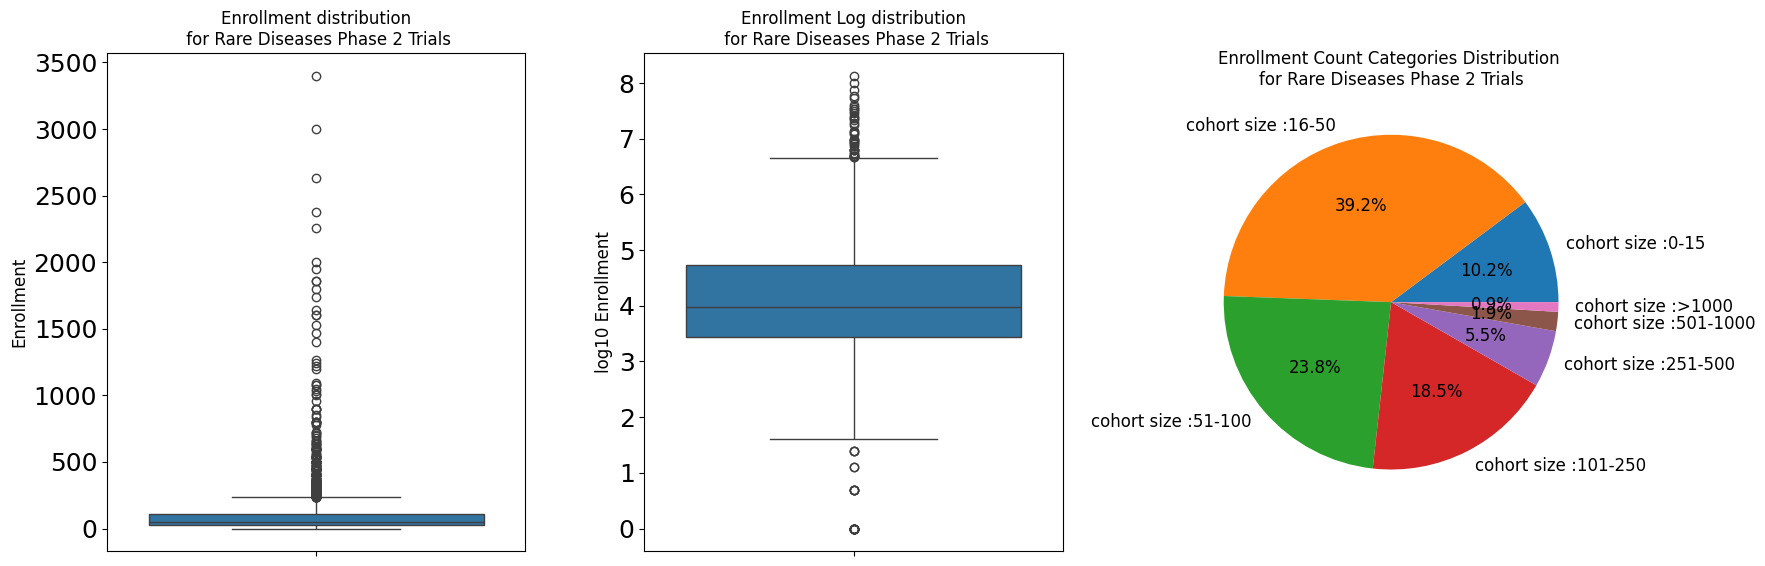

In [187]:
ct_rawx = ct_raw[ct_raw['is_Rare']==1]
ct_rawx = ct_rawx[ct_rawx['PHASE2']==1]
ct_rawx['tot_enroll'] = ct_rawx['original_enrollment_count']
xx=ct_rawx.iloc[:,67:75]
xx
xx['log_tot_enroll'] = np.log1p(xx['tot_enroll'])
# Drop the specified columns from xx to create xxx
xxx = xx.drop(columns=['tot_enroll', 'log_tot_enroll'])

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming xx is already defined
xx['log_tot_enroll'] = np.log1p(xx['tot_enroll'])

# Drop the specified columns from xx to create xxx
xxx = xx.drop(columns=['tot_enroll', 'log_tot_enroll'])

# Calculate the sums of True values for each column
true_counts = xxx.sum()

# Create a new DataFrame from the calculated sums
true_counts_df = pd.DataFrame(true_counts, columns=['True_Counts'])

# Rename columns by removing the prefix enrollment_count_cat
true_counts_df.index = true_counts_df.index.str.replace('enrollment_count_cat_', 'cohort size :')

# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first boxplot
sns.boxplot(data=xx['tot_enroll'], ax=axs[0])
axs[0].set_title('Enrollment distribution\n for Rare Diseases Phase 2 Trials', fontsize=12)
axs[0].set_ylabel('Enrollment', fontsize=12)

# Plot the second boxplot
sns.boxplot(data=xx['log_tot_enroll'], ax=axs[1])
axs[1].set_title('Enrollment Log distribution\n for Rare Diseases Phase 2 Trials', fontsize=12)
axs[1].set_ylabel('log10 Enrollment', fontsize=12)

# Create a pie chart of the true counts in the third subplot
true_counts_df.plot.pie(y='True_Counts', ax=axs[2], autopct='%1.1f%%', startangle=0, legend=False, fontsize=12)
axs[2].set_title('Enrollment Count Categories Distribution \nfor Rare Diseases Phase 2 Trials', fontsize=12)
axs[2].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


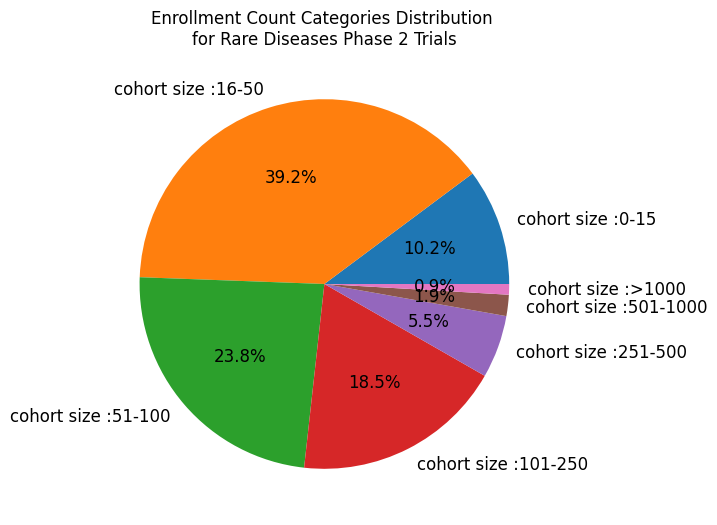

In [185]:

# pie chart of the true counts
# Create a pie chart of the true counts
true_counts_df.plot.pie(y='True_Counts', figsize=(6, 6), autopct='%1.1f%%', startangle=0, legend=False,fontsize=12)
plt.title('Enrollment Count Categories Distribution \nfor Rare Diseases Phase 2 Trials', fontsize=12)
plt.ylabel('')

plt.show()


In [39]:
# Convert properly to bool all the col with only 1 & 0s
# Assuming ct_raw is your DataFrame
for col in ct_raw.columns:
    # Check if the column is numerical and contains only 1 and 0
    if ct_raw[col].dtype in [np.int64, np.float64] and ct_raw[col].isin([0, 1]).all():
        # Convert the column to boolean
        ct_raw[col] = ct_raw[col].astype(bool)


# convert to float64 'nb_primaryOutcomes','nb_secondaryOutcomes','arm_group_count'
ct_raw['nb_primaryOutcomes'] = ct_raw['nb_primaryOutcomes'].astype('float64')
ct_raw['nb_secondaryOutcomes'] = ct_raw['nb_secondaryOutcomes'].astype('float64')
ct_raw['arm_group_count'] = ct_raw['arm_group_count'].astype('float64')



## Create the dummy variables

In [311]:
# Step 1: Filter rows where class is 'INDUSTRY'
industry_rows = collab[collab['class'] == 'INDUSTRY']
# Step 2: Group by 'nct_id' and count the occurrences
industry_counts = industry_rows.groupby('nct_id').size().reset_index(name='industry_count')
# Step 3: Merge the counts back into the original DataFrame
collab = collab.merge(industry_counts, on='nct_id', how='left')

collab['industry_count'] = collab['industry_count'].fillna(0).astype(int)
collab['industry_ratio'] = collab['industry_count'] / collab['number_of_collaborators']


# select distinct nct_id, industry_ratio and add to ct_raw and fill missing with 0
industry_ratio = collab[['nct_id','industry_ratio']].drop_duplicates()
ct_raw = pd.merge(ct_raw, industry_ratio, on='nct_id', how='left').fillna(0)


## derive the funding type

def categorize_funding(row):
    if row['org_study_class'] == 'INDUSTRY' and row['industry_ratio'] !=0:
        return 'INDUSTRY'
    elif row['org_study_class'] != 'INDUSTRY':
        if 'NIH' not in [row['org_study_class'], row['sponsor_class']] and 'INDUSTRY' in [row['sponsor_class']] and row['industry_ratio'] != 0:
            return 'INDUSTRY'
        elif 'NIH' in [row['org_study_class'], row['sponsor_class']] :
            return 'NIH'
    return 'OTHER'

ct_raw['funding_type'] = ct_raw.apply(categorize_funding, axis=1)

# One-hot encode the 'funding_type' column
one_hot_encoded_data = pd.get_dummies(ct_raw['funding_type'], prefix='funding_type')
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['funding_type_OTHER'])
ct_raw.drop(columns=['funding_type'], inplace=True)
ct_raw = pd.concat([ct_raw, one_hot_encoded_data], axis=1)

In [312]:
"""# Step 1: Calculate value counts
value_counts = ct_raw['subregion'].value_counts()

# Step 2: Identify values that appear less than 100 times
values_to_replace = value_counts[value_counts < 5].index

# Step 3: Replace these values with "drop"
ct_raw['subregion'] = ct_raw['subregion'].apply(lambda x: "other_regions" if x in values_to_replace else x)


# Step 1: Calculate value counts
value_counts = ct_raw['overallofficial_country'].value_counts()

# Step 2: Identify values that appear less than 100 times
values_to_replace = value_counts[value_counts < 5].index

# Step 3: Replace these values with "drop"
ct_raw['overallofficial_country'] = ct_raw['overallofficial_country'].apply(lambda x: "other_countries" if x in values_to_replace else x)"""


one_hot_encoded_data = pd.get_dummies(ct_raw['subregion'], prefix='continent')
# I'm gonna drop continent_Western Europe since its the reference category
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['continent_Western Europe'])
col_overallofficial_continent =(one_hot_encoded_data.columns).to_list()
# Drop the original 'overallofficial_continent' column
# Concatenate the one-hot encoded data with the original DataFrame
ct_raw = pd.concat([ct_raw, one_hot_encoded_data], axis=1)

one_hot_encoded_data = pd.get_dummies(ct_raw['overallofficial_country'], prefix='overallofficial_country')
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['overallofficial_country_France'])
col_overallofficial_country =(one_hot_encoded_data.columns).to_list()
ct_raw = pd.concat([ct_raw, one_hot_encoded_data], axis=1)

In [313]:

print(ct_raw['org_study_class'].value_counts())
ct_raw['org_study_class'] = ct_raw['org_study_class'].replace({'UNKNOWN':'drop','FED':'drop','OTHER_GOV':'drop','OTHER':'drop','INDIV':'drop'})

print(ct_raw['sponsor_class'].value_counts())
ct_raw['sponsor_class'] = ct_raw['sponsor_class'].replace({'UNKNOWN':'drop','FED':'drop','OTHER_GOV':'drop','OTHER':'drop','INDIV':'drop'})



print(ct_raw['interventionModel'].value_counts())
ct_raw['interventionModel'] = ct_raw['interventionModel'].replace({'UNKNOWN':'drop','FAMILY_BASED':'drop','FACTORIAL':'drop','CASE_CROSSOVER':'drop','ECOLOGIC_OR_COMMUNITY':'drop','OTHER':'drop'})

print(ct_raw['primaryPurpose'].value_counts())
ct_raw['primaryPurpose'] = ct_raw['primaryPurpose'].replace({'OTHER':'drop','DEVICE_FEASIBILITY':'drop','SCREENING':'drop','HEALTH_SERVICES_RESEARCH':'drop'})

print(ct_raw['mask_type'].value_counts())
ct_raw['mask_type'] = ct_raw['mask_type'].replace({'NONE':'drop'})


print(ct_raw['intervention_type'].value_counts())
ct_raw['intervention_type'] = ct_raw['intervention_type'].replace({'OTHER':'drop','GENETIC':'drop','DIAGNOSTIC_TEST':'drop','RADIATION':'drop','NA FOR OBSERVATIONAL':'drop'})

org_study_class
INDUSTRY      10599
UNIVERSITY     2811
HOSPITAL       2457
OTHER           972
NETWORK         293
NIH             163
OTHER_GOV        91
FED              32
INDIV             8
UNKNOWN           7
Name: count, dtype: int64
sponsor_class
INDUSTRY      10578
UNIVERSITY     2422
HOSPITAL       2156
OTHER          1615
NETWORK         279
NIH             245
OTHER_GOV        94
FED              33
INDIV            11
Name: count, dtype: int64
interventionModel
PARALLEL        9239
SINGLE_GROUP    4018
SEQUENTIAL      2142
CROSSOVER       1951
FACTORIAL         83
Name: count, dtype: int64
primaryPurpose
TREATMENT                   12924
PREVENTION                   1590
OTHER                        1190
BASIC_SCIENCE                1137
DIAGNOSTIC                    257
SUPPORTIVE_CARE               224
HEALTH_SERVICES_RESEARCH       74
SCREENING                      31
DEVICE_FEASIBILITY              6
Name: count, dtype: int64
mask_type
NONE         9039
QUADRUPLE    3

In [314]:

ct=ct_raw.copy()

one_hot_encoded_data = pd.get_dummies(ct['org_study_class'], prefix='org_study_class')
# I'm gonna drop hospital cuz whatever to avoid multicollinearity
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['org_study_class_drop'])
col_org_study_class =(one_hot_encoded_data.columns).to_list()
ct = pd.concat([ct, one_hot_encoded_data], axis=1)

one_hot_encoded_data = pd.get_dummies(ct['sponsor_class'], prefix='sponsor_class')
# I'm gonna drop hospital cuz whatever to avoid multicollinearity
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['sponsor_class_drop'])
col_sponsor_class =(one_hot_encoded_data.columns).to_list()
ct = pd.concat([ct, one_hot_encoded_data], axis=1)

#### create a column is_RANDOMIZED
ct['is_randomized'] = (ct['randomized'] == 'RANDOMIZED').astype(bool)



one_hot_encoded_data = pd.get_dummies(ct['interventionModel'], prefix='interventionModel')
# Dropping OTHER to avoid multicollinearity
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['interventionModel_drop'])
ct = pd.concat([ct, one_hot_encoded_data], axis=1)

one_hot_encoded_data = pd.get_dummies(ct['mask_type'], prefix='mask_type')
# Dropping  to avoid multicollinearity /// drop double since it's the most common
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['mask_type_drop'])
ct = pd.concat([ct, one_hot_encoded_data], axis=1)

one_hot_encoded_data = pd.get_dummies(ct['primaryPurpose'], prefix='primaryPurpose')
# Dropping OTHER to avoid multicollinearity
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['primaryPurpose_drop'])
col_primaryPurpose =(one_hot_encoded_data.columns).to_list()
ct = pd.concat([ct, one_hot_encoded_data], axis=1)

one_hot_encoded_data = pd.get_dummies(ct['intervention_type'], prefix='intervention_type')
# Dropping OTHER to avoid multicollinearity
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['intervention_type_drop'])
ct = pd.concat([ct, one_hot_encoded_data], axis=1)



In [315]:
ct_raw.columns

Index(['nct_id', 'org_name', 'org_study_class', 'overallStatus', 'startDate',
       'lead_sponsor', 'sponsor_class', 'oversighthasdmc',
       'isfdaregulateddrug', 'isfdaregulateddevice',
       ...
       'overallofficial_country_Turkey', 'overallofficial_country_Uganda',
       'overallofficial_country_Ukraine',
       'overallofficial_country_United Arab Emirates',
       'overallofficial_country_United Kingdom',
       'overallofficial_country_United States',
       'overallofficial_country_Uzbekistan',
       'overallofficial_country_Venezuela', 'overallofficial_country_Vietnam',
       'overallofficial_country_Zimbabwe'],
      dtype='object', length=208)

In [316]:
ct_raw

,nct_id,org_name,org_study_class,overallStatus,startDate,lead_sponsor,sponsor_class,oversighthasdmc,isfdaregulateddrug,isfdaregulateddevice,interventionModel,primaryPurpose,mask_type,randomized,arm_group_count,intervention_type,healthyVolunteers,overallofficial_country,nb_primaryOutcomes,nb_secondaryOutcomes,is_covid_trial,is_Rare,pregnant_only,ci_pregnancy,original_enrollment_count,more_than_50_orig_enroll,more_than_75_orig_enroll,subregion,enrolled_less_than_orig_enroll,enrollmentCountSame,conditions_count,Participant_masked,Care_provider_masked,Investigator_masked,Outcomes_assessor_masked,condition_mesh_count,intervention_mesh_count,primaryOutcomesSame,secondaryOutcomesSame,orgFullNameSame,responsiblePartySame,leadSponsorSame,experimental_only,exp_against_placebo,exp_against_active_comp,total_centers,number_of_collaborators,MALE_ONLY,FEMALE_ONLY,include_children,include_elderly,PRINCIPAL_INVESTIGATOR_responsibleParty,SPONSOR_INVESTIGATOR_responsibleParty,PHASE1,PHASE2,PHASE3,collaborators =_1,collaborators =_2,collaborators =_>2,total_centers_count =_11-25,total_centers_count =_2,total_centers_count =_3-4,total_centers_count =_5-10,total_centers_count =_>25,enrollment_count_cat_16-50,enrollment_count_cat_51-100,enrollment_count_cat_101-250,enrollment_count_cat_251-500,enrollment_count_cat_501-1000,enrollment_count_cat_>1000,industry_ratio,funding_type_INDUSTRY,funding_type_NIH,continent_Australia and New Zealand,continent_Caribbean,continent_Central America,continent_Central Asia,continent_Eastern Africa,continent_Eastern Asia,continent_Eastern Europe,continent_Melanesia,continent_Middle Africa,continent_Northern Africa,continent_Northern America,continent_Northern Europe,continent_South America,continent_South-Eastern Asia,continent_Southern Africa,continent_Southern Asia,continent_Southern Europe,continent_Western Africa,continent_Western Asia,overallofficial_country_Albania,overallofficial_country_Argentina,overallofficial_country_Armenia,overallofficial_country_Australia,overallofficial_country_Austria,overallofficial_country_Azerbaijan,overallofficial_country_Bahrain,overallofficial_country_Bangladesh,overallofficial_country_Belarus,overallofficial_country_Belgium,overallofficial_country_Bolivia,overallofficial_country_Bosnia and Herzegovina,overallofficial_country_Botswana,overallofficial_country_Brazil,overallofficial_country_Bulgaria,overallofficial_country_Burkina Faso,overallofficial_country_Canada,overallofficial_country_Chile,overallofficial_country_China,overallofficial_country_Colombia,overallofficial_country_Comoros,overallofficial_country_Congo,overallofficial_country_Costa Rica,overallofficial_country_Croatia,overallofficial_country_Czech Republic,overallofficial_country_Czechia,overallofficial_country_Denmark,overallofficial_country_Dominican Republic,overallofficial_country_Ecuador,overallofficial_country_Egypt,overallofficial_country_El Salvador,overallofficial_country_Estonia,overallofficial_country_Ethiopia,overallofficial_country_Finland,overallofficial_country_Gabon,overallofficial_country_Gambia,overallofficial_country_Georgia,overallofficial_country_Germany,overallofficial_country_Ghana,overallofficial_country_Greece,overallofficial_country_Guatemala,overallofficial_country_Honduras,overallofficial_country_Hong Kong,overallofficial_country_Hungary,overallofficial_country_India,overallofficial_country_Indonesia,overallofficial_country_Iran,overallofficial_country_Iraq,overallofficial_country_Ireland,overallofficial_country_Israel,overallofficial_country_Italy,overallofficial_country_Ivory Coast,overallofficial_country_Jamaica,overallofficial_country_Japan,overallofficial_country_Jordan,overallofficial_country_Kazakhstan,overallofficial_country_Kenya,overallofficial_country_Kuwait,overallofficial_country_Laos,overallofficial_country_Lebanon,overallofficial_country_Lithuania,overallofficial_country_Madagascar,overallofficial_country_Malaysia,overallofficial_country_Mali,overallofficial_country_Mexico,

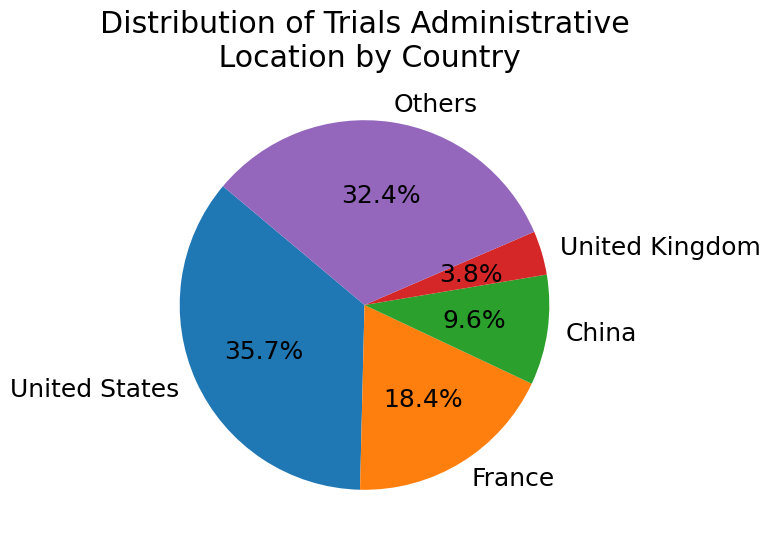

In [50]:
# Count the occurrences of each value in the 'overallofficial_country' column
country_counts = ct_raw['overallofficial_country'].value_counts()

# Select the top 10 values
top_10_countries = country_counts[:4]

# Sum the counts of the remaining values
others_count = country_counts[4:].sum()

# Create a new DataFrame with the top 10 values and the "Others" category
top_10_countries['Others'] = others_count

# Plot the pie chart
plt.figure(figsize=(6, 6))
# adjust the fontsize
plt.rcParams.update({'font.size': 18})
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trials Administrative\n Location by Country')
plt.show()

In [317]:
#ct_raw.drop(columns=['estimated_enrollment','total_centers','number_of_collaborators','nb_primaryOutcomes','nb_secondaryOutcomes'],inplace=True)

In [318]:
# filter out rows where NA = true
#ct = ct[ct['NA'] != True]
#ct= ct[ct['estimated_enrollment'] != 0]
#ct=ct[ct['startDate']>=2018]

In [319]:
ct['overallStatus'].value_counts()

overallStatus
COMPLETED     13115
TERMINATED     4318
Name: count, dtype: int64

## Create the exploded datasets for conditions, mesh, //locations//, org_name and lead_sponsor

In [320]:
ct_raw=ct.copy()

In [321]:
## mesh
term_meshes
# transform term : term + '_' + mesh_category
term_meshes['mesh_term'] = term_meshes['term'] + '_' +term_meshes['mesh_category']
term_meshes = term_meshes[term_meshes['tree_level'] == 'browseBranches']
term_meshesx = term_meshes[['nct_id','mesh_term']]
term_meshesx = term_meshesx[['mesh_term','nct_id']].drop_duplicates()
term_meshesx['mesh_term'] = 'mesh_term:' + term_meshesx['mesh_term']
# Pivot the DataFrame +# Convert the values to boolean
pivot_mesh_main = term_meshesx.pivot(index='nct_id', columns='mesh_term', values='mesh_term').notna()

merged_df = ct_raw.merge(pivot_mesh_main, on='nct_id', how='left')
col_mesh =(pivot_mesh_main.columns).to_list()

# Fill the NaN values in the specified columns with False
for column in col_mesh:
    if column in merged_df.columns:
        merged_df[column] = merged_df[column].fillna(False)


ct_raw = merged_df

In [322]:

## centers' cities

## add multi-center, multi-country, multi-city, multi-subregion, multi-continent
locations = locations[locations['nct_id'].isin(ct_raw['nct_id'])]
multi_df = locations.groupby('nct_id').agg(
    country_list=('country', lambda x: list(x.dropna().unique())),
    continent_list=('continent', lambda x: list(x.dropna().unique())),
    city_list=('city', lambda x: list(x.dropna().unique())),
    subregion_list=('subregion', lambda x: list(x.dropna().unique()))
).reset_index()

# Check if the list in each respective column contains more than one unique item
"""multi_df['multi_country'] = multi_df['country_list'].apply(lambda x: len(x) > 1)
multi_df['multi_city'] = multi_df['city_list'].apply(lambda x: len(x) > 1)
multi_df['multi_continent'] = multi_df['continent_list'].apply(lambda x: len(x) > 1)
multi_df['multi_subregion'] = multi_df['subregion_list'].apply(lambda x: len(x) > 1)"""
multi_df['multi_country'] = multi_df['country_list'].apply(lambda x: len(x) if x else 1)
multi_df['multi_city'] = multi_df['city_list'].apply(lambda x: len(x) if x else 1)
multi_df['multi_continent'] = multi_df['continent_list'].apply(lambda x: len(x) if x else 1)
multi_df['multi_subregion'] = multi_df['subregion_list'].apply(lambda x: len(x) if x else 1)

In [323]:


# add the multi columns to ct_raw and fill missing ones with false
multi_cols = ['multi_country', 'multi_city', 'multi_continent', 'multi_subregion']
ct_raw = pd.merge(ct_raw, multi_df[['nct_id'] + multi_cols], on='nct_id', how='left').fillna(1)

In [324]:
ct_raw.drop(columns=['subregion','overallofficial_country','org_study_class',
                              'sponsor_class','randomized','interventionModel',
                              'mask_type','primaryPurpose','intervention_type'],inplace=True)

In [325]:
"""#### Creation of ordinal numerical dataset version
col_names =['nct_id','overallStatus','org_name', 'org_study_class', 'startDate',
       'lead_sponsor', 'sponsor_class', 'oversighthasdmc',
       'isfdaregulateddrug', 'isfdaregulateddevice', 
       'interventionModel', 'primaryPurpose', 'mask_type',
       'randomized', 'estimated_enrollment', 'arm_group_count',
       'intervention_type', 'healthyVolunteers', 'overallofficial_country',
       'nb_primaryOutcomes', 'nb_secondaryOutcomes', 'responsibleParty', 'pregnant_only', 'ci_pregnancy', 'subregion',
       'PHASE1', 'PHASE2', 'PHASE3',  'industry_ratio',
       'funding_type', 'MALE_ONLY', 'FEMALE_ONLY', 'include_children',
       'include_elderly', 'is_covid_trial']

ct_raw_num = ct_raw[col_names]


ct_raw.drop(columns=['funding_type', 'responsibleParty','subregion','overallofficial_country','org_study_class',
                              'sponsor_class','randomized','interventionModel',
                              'mask_type','primaryPurpose','intervention_type'],inplace=True)




# Select columns to be encoded
columns_to_encode = ct_raw_num.columns.difference(['nct_id', 'startDate','industry_ratio'])

# Initialize the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
ct_raw_num[columns_to_encode] = encoder.fit_transform(ct_raw_num[columns_to_encode])

# Display the transformed DataFrame
ct_raw_num
ct_raw_num.set_index('nct_id', inplace=True)
ct_raw_num.to_pickle('clean_data/ordinal_dataset.pkl')"""


"#### Creation of ordinal numerical dataset version\ncol_names =['nct_id','overallStatus','org_name', 'org_study_class', 'startDate',\n       'lead_sponsor', 'sponsor_class', 'oversighthasdmc',\n       'isfdaregulateddrug', 'isfdaregulateddevice', \n       'interventionModel', 'primaryPurpose', 'mask_type',\n       'randomized', 'estimated_enrollment', 'arm_group_count',\n       'intervention_type', 'healthyVolunteers', 'overallofficial_country',\n       'nb_primaryOutcomes', 'nb_secondaryOutcomes', 'responsibleParty', 'pregnant_only', 'ci_pregnancy', 'subregion',\n       'PHASE1', 'PHASE2', 'PHASE3',  'industry_ratio',\n       'funding_type', 'MALE_ONLY', 'FEMALE_ONLY', 'include_children',\n       'include_elderly', 'is_covid_trial']\n\nct_raw_num = ct_raw[col_names]\n\n\nct_raw.drop(columns=['funding_type', 'responsibleParty','subregion','overallofficial_country','org_study_class',\n                              'sponsor_class','randomized','interventionModel',\n                     

In [326]:
# since we will work both on trials >2011 and >2018 we will only count the top names >2018
df = ct_raw[(ct_raw['startDate']>=2007)]

org_name = df[['nct_id','org_name']]
lead_sponsor = df[['nct_id','lead_sponsor']]

lead_sponsor['lead_sponsor'] = 'lead_sponsor_' + lead_sponsor['lead_sponsor'].astype(str)
org_name['org_name'] = 'org_name_' + org_name['org_name'].astype(str)




org_name_counts = org_name['org_name'].value_counts()

In [327]:
# Corrected code to select the top 10 names
top_org_name = org_name_counts.sort_values(ascending=False).head(150)
top_org_name

org_name
org_name_Pfizer                             319
org_name_AstraZeneca                        275
org_name_Eli Lilly and Company              274
org_name_Boehringer Ingelheim               190
org_name_Novartis                           167
                                           ... 
org_name_Colgate Palmolive                   18
org_name_University of Rochester             18
org_name_Egymedicalpedia                     17
org_name_Hoosier Cancer Research Network     17
org_name_Corcept Therapeutics                17
Name: count, Length: 150, dtype: int64

In [328]:
# since we will work both on trials >2011 and >2018 we will only count the top names >2018
df = ct_raw[(ct_raw['startDate']>=2007)]

org_name = df[['nct_id','org_name']]
lead_sponsor = df[['nct_id','lead_sponsor']]

lead_sponsor['lead_sponsor'] = 'lead_sponsor_' + lead_sponsor['lead_sponsor'].astype(str)
org_name['org_name'] = 'org_name_' + org_name['org_name'].astype(str)




org_name_counts = org_name['org_name'].value_counts()
#org_names_to_keep = org_name_counts[org_name_counts >= 5].index
org_names_to_keep = org_name_counts.sort_values(ascending=False).head(150).index

org_name_filtered = org_name[org_name['org_name'].isin(org_names_to_keep)]

lead_sponsor_counts = lead_sponsor['lead_sponsor'].value_counts()
#lead_sponsor_to_keep = lead_sponsor_counts[lead_sponsor_counts >= 5].index
lead_sponsor_to_keep = lead_sponsor_counts.sort_values(ascending=False).head(150).index
lead_sponsor_filtered = lead_sponsor[lead_sponsor['lead_sponsor'].isin(lead_sponsor_to_keep)]

org_name_filtered = org_name_filtered.drop_duplicates(subset=['nct_id'])
pivot_org_name_filtered = org_name_filtered.pivot(index='nct_id', columns='org_name', values='org_name')

# Convert the values to boolean
pivot_org_name_filtered = pivot_org_name_filtered.notna()
# Merge the DataFrames on 'nct_id'
merged_df = ct_raw.merge(pivot_org_name_filtered, on='nct_id', how='left')
col_org_name =(pivot_org_name_filtered.columns).to_list()



# Fill the NaN values in the specified columns with False
for column in col_org_name:
    if column in merged_df.columns:
        merged_df[column] = merged_df[column].fillna(False)

lead_sponsor_filtered = lead_sponsor_filtered.drop_duplicates(subset=['nct_id'])
pivot_lead_sponsor = lead_sponsor_filtered.pivot(index='nct_id', columns='lead_sponsor', values='lead_sponsor')

# Convert the values to boolean
pivot_lead_sponsor = pivot_lead_sponsor.notna()
# Merge the DataFrames on 'nct_id'
merged_df = merged_df.merge(pivot_lead_sponsor, on='nct_id', how='left')
col_leadsponsor =(pivot_lead_sponsor.columns).to_list()



# Fill the NaN values in the specified columns with False
for column in col_leadsponsor:
    if column in merged_df.columns:
        merged_df[column] = merged_df[column].fillna(False)


# fill bool na with false
# select only the columns that are boolean
bol_col = merged_df.select_dtypes(include=[bool]).columns
merged_df[bol_col] = merged_df[bol_col].fillna(False)
ct_raw = merged_df

In [329]:
ct_raw = merged_df

In [330]:
ct_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17433 entries, 0 to 17432
Columns: 610 entries, nct_id to lead_sponsor_argenx
dtypes: bool(577), float64(14), int32(1), object(18)
memory usage: 13.9+ MB


In [331]:
ct_raw
ct_raw.drop(columns=['lead_sponsor','org_name'],inplace=True)

In [332]:
# Step 1: Get the first 6 column names
first_six_columns = ct_raw.columns[:6]

# Step 2: Specify the columns to move
columns_to_move = ['multi_country', 'multi_city', 'multi_continent', 'multi_subregion']

# Step 3: Get the remaining columns (excluding the first 6 and the ones to move)
remaining_columns = [col for col in ct_raw.columns if col not in first_six_columns and col not in columns_to_move]

# Step 4: Create the new column order
new_column_order = list(first_six_columns) + columns_to_move + remaining_columns

# Step 5: Reindex the DataFrame with the new column order
ct_raw = ct_raw[new_column_order]

In [333]:
ct_raw['startDate'].value_counts()

startDate
2020    4606
2019    4573
2021    4090
2022    2776
2023    1184
2024     204
Name: count, dtype: int64

In [334]:
ct_raw

,nct_id,overallStatus,startDate,oversighthasdmc,isfdaregulateddrug,isfdaregulateddevice,multi_country,multi_city,multi_continent,multi_subregion,arm_group_count,healthyVolunteers,nb_primaryOutcomes,nb_secondaryOutcomes,is_covid_trial,is_Rare,pregnant_only,ci_pregnancy,original_enrollment_count,more_than_50_orig_enroll,more_than_75_orig_enroll,enrolled_less_than_orig_enroll,enrollmentCountSame,conditions_count,Participant_masked,Care_provider_masked,Investigator_masked,Outcomes_assessor_masked,condition_mesh_count,intervention_mesh_count,primaryOutcomesSame,secondaryOutcomesSame,orgFullNameSame,responsiblePartySame,leadSponsorSame,experimental_only,exp_against_placebo,exp_against_active_comp,total_centers,number_of_collaborators,MALE_ONLY,FEMALE_ONLY,include_children,include_elderly,PRINCIPAL_INVESTIGATOR_responsibleParty,SPONSOR_INVESTIGATOR_responsibleParty,PHASE1,PHASE2,PHASE3,collaborators =_1,collaborators =_2,collaborators =_>2,total_centers_count =_11-25,total_centers_count =_2,total_centers_count =_3-4,total_centers_count =_5-10,total_centers_count =_>25,enrollment_count_cat_16-50,enrollment_count_cat_51-100,enrollment_count_cat_101-250,enrollment_count_cat_251-500,enrollment_count_cat_501-1000,enrollment_count_cat_>1000,industry_ratio,funding_type_INDUSTRY,funding_type_NIH,continent_Australia and New Zealand,continent_Caribbean,continent_Central America,continent_Central Asia,continent_Eastern Africa,continent_Eastern Asia,continent_Eastern Europe,continent_Melanesia,continent_Middle Africa,continent_Northern Africa,continent_Northern America,continent_Northern Europe,continent_South America,continent_South-Eastern Asia,continent_Southern Africa,continent_Southern Asia,continent_Southern Europe,continent_Western Africa,continent_Western Asia,overallofficial_country_Albania,overallofficial_country_Argentina,overallofficial_country_Armenia,overallofficial_country_Australia,overallofficial_country_Austria,overallofficial_country_Azerbaijan,overallofficial_country_Bahrain,overallofficial_country_Bangladesh,overallofficial_country_Belarus,overallofficial_country_Belgium,overallofficial_country_Bolivia,overallofficial_country_Bosnia and Herzegovina,overallofficial_country_Botswana,overallofficial_country_Brazil,overallofficial_country_Bulgaria,overallofficial_country_Burkina Faso,overallofficial_country_Canada,overallofficial_country_Chile,overallofficial_country_China,overallofficial_country_Colombia,overallofficial_country_Comoros,overallofficial_country_Congo,overallofficial_country_Costa Rica,overallofficial_country_Croatia,overallofficial_country_Czech Republic,overallofficial_country_Czechia,overallofficial_country_Denmark,overallofficial_country_Dominican Republic,overallofficial_country_Ecuador,overallofficial_country_Egypt,overallofficial_country_El Salvador,overallofficial_country_Estonia,overallofficial_country_Ethiopia,overallofficial_country_Finland,overallofficial_country_Gabon,overallofficial_country_Gambia,overallofficial_country_Georgia,overallofficial_country_Germany,overallofficial_country_Ghana,overallofficial_country_Greece,overallofficial_country_Guatemala,overallofficial_country_Honduras,overallofficial_country_Hong Kong,overallofficial_country_Hungary,overallofficial_country_India,overallofficial_country_Indonesia,overallofficial_country_Iran,overallofficial_country_Iraq,overallofficial_country_Ireland,overallofficial_country_Israel,overallofficial_country_Italy,overallofficial_country_Ivory Coast,overallofficial_country_Jamaica,overallofficial_country_Japan,overallofficial_country_Jordan,overallofficial_country_Kazakhstan,overallofficial_country_Kenya,overallofficial_country_Kuwait,overallofficial_country_Laos,overallofficial_country_Lebanon,overallofficial_country_Lithuania,overallofficial_country_Madagascar,overallofficial_country_Malaysia,overallofficial_country_Mali,overallofficial_country_Mexico,overallofficial_country_Moldova,overallofficial_country_Mozambique,overallofficial_country_Nepal,over

In [335]:
# List of columns to rename
ct_raw['overallStatus'] = ct_raw['overallStatus'].replace({'TERMINATED': 1, 'COMPLETED': 0})
columns_to_rename = [
    'mesh_term:Rare Diseases_condition',
    'mesh_term:Nervous System Diseases_condition',
    'mesh_term:Neoplasms_condition',
    'mesh_term:Respiratory Tract (Lung and Bronchial) Diseases_condition',
    'mesh_term:Infections_condition',
    'mesh_term:Heart and Blood Diseases_condition',
    'mesh_term:Urinary Tract, Sexual Organs, and Pregnancy Conditions_condition',
    'mesh_term:Diseases and Abnormalities at or Before Birth_condition',
    'mesh_term:Digestive System Diseases_condition',
    'mesh_term:Blood and Lymph Conditions_condition',
    'mesh_term:Immune System Diseases_condition',
    'mesh_term:Skin and Connective Tissue Diseases_condition',
    'mesh_term:Nutritional and Metabolic Diseases_condition',
    'mesh_term:Musculoskeletal Diseases_condition',
    'mesh_term:Gland and Hormone Related Diseases_condition'
]

# Create a dictionary for renaming
rename_dict = {col: 'bb_' + col for col in columns_to_rename}

# Rename the columns in the DataFrame
ct_raw.rename(columns=rename_dict, inplace=True)

ct_raw.columns = ct_raw.columns.str.replace('bb_mesh_term:Urinary Tract,Sexual Organs and Pregnancy', 'bb_mesh_term:UT,Gonads and Pregnancy')
ct_raw.columns = ct_raw.columns.str.replace('bb_mesh_term:Respiratory Tract (Lung and Bronchial) Diseases_condition', 'bb_mesh_term:Respiratory TractDiseases_condition')
ct_raw.columns = ct_raw.columns.str.replace('bb_mesh_term:Diseases and Abnormalities at or Before Birth_condition', 'bb_mesh_term:Disease at or Before Birth_condition')

ct_raw.columns = ct_raw.columns.str.replace('Conditions_condition', '')
ct_raw.columns = ct_raw.columns.str.replace('_condition', '')
ct_raw.columns = ct_raw.columns.str.replace('Diseases', '')
ct_raw.columns = ct_raw.columns.str.replace('overallofficial_country','country')
ct_raw.columns = ct_raw.columns.str.replace('mesh_term','mesh')



# Re assign some columns to bool 
ct_raw['is_randomized'] = ct_raw['is_randomized'].astype(bool)
ct_raw['PRINCIPAL_INVESTIGATOR_responsibleParty'] = ct_raw['PRINCIPAL_INVESTIGATOR_responsibleParty'].astype(bool)
ct_raw['SPONSOR_INVESTIGATOR_responsibleParty'] = ct_raw['SPONSOR_INVESTIGATOR_responsibleParty'].astype(bool)

In [336]:
ct_raw.set_index('nct_id', inplace=True)

In [337]:

#convert object columns to bool
for col in ct_raw.columns:
    if ct_raw[col].dtype == 'object':
        ct_raw[col] = ct_raw[col].astype(bool)


In [338]:

ct_raw.to_pickle('clean_data/main_bigger3.pkl')

In [339]:
ct_raw['overallStatus'].value_counts()

overallStatus
0    13115
1     4318
Name: count, dtype: int64